In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
"""
Para deixar o CSV menos pesado e conseguir trabalhar de uma forma mais confortável, verificamos somente as colunas que iríamos utilizar e transformamos isso em um novo CSV.
"""
colunas = ['Admitidos/Desligados','Municipio', 'CBO 2002 Ocupacao', 'CNAE 1.0 Classe', 'CNAE 2.0 Classe', 'CNAE 2.0 Subclas', 'Grau Instrucao', 'IBGE Subsetor', 'Ind Aprendiz', 'Ind Portador Defic', 'Competencia Declarada', 'Idade', 'Raca Cor', 'Salario Mensal','Saldo Mov','Sexo','Tipo Estab','Tipo Defic','Tipo Mov Desagregado','UF']
df = pd.read_csv(r'C:\Users\Pichau\Documents\GitHub\AnaliseCAGED/CAGEDEST.csv',encoding = 'iso-8859-1', delimiter=";", low_memory=False, usecols= colunas)
df.to_csv("CAGEDLIGTH.csv")

In [3]:
df = pd.read_csv(r'C:\Users\Pichau\Documents\GitHub\AnaliseCAGED/CAGEDLIGTH.csv',encoding = 'iso-8859-1', delimiter=",", low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616053 entries, 0 to 2616052
Data columns (total 21 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Unnamed: 0             int64 
 1   Admitidos/Desligados   int64 
 2   Competencia Declarada  int64 
 3   Municipio              int64 
 4   CBO 2002 Ocupacao      int64 
 5   CNAE 1.0 Classe        int64 
 6   CNAE 2.0 Classe        int64 
 7   CNAE 2.0 Subclas       int64 
 8   Grau Instrucao         int64 
 9   IBGE Subsetor          int64 
 10  Idade                  int64 
 11  Ind Aprendiz           int64 
 12  Ind Portador Defic     int64 
 13  Raca Cor               int64 
 14  Salario Mensal         object
 15  Saldo Mov              int64 
 16  Sexo                   int64 
 17  Tipo Estab             int64 
 18  Tipo Defic             int64 
 19  Tipo Mov Desagregado   int64 
 20  UF                     int64 
dtypes: int64(20), object(1)
memory usage: 419.1+ MB


In [5]:
'dropando a coluna de index'
df.drop(columns=['Unnamed: 0'])

,Admitidos/Desligados,Competencia Declarada,Municipio,CBO 2002 Ocupacao,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Grau Instrucao,IBGE Subsetor,Idade,Ind Aprendiz,Ind Portador Defic,Raca Cor,Salario Mensal,Saldo Mov,Sexo,Tipo Estab,Tipo Defic,Tipo Mov Desagregado,UF
0,1,201901,510267,413110,1155,1156,115600,9,25,29,0,0,8,"002000,00",1,1,1,0,1,51
1,1,201901,510805,622020,1112,1113,111301,7,25,40,0,0,2,"001000,00",1,1,3,0,1,51
2,1,201901,510263,622020,1155,1156,115600,7,25,17,0,0,2,"001497,00",1,1,3,0,1,51
3,1,201901,510267,141115,1120,1121,112101,9,25,24,0,0,8,"002000,00",1,1,3,0,1,51
4,1,201901,510525,621005,1155,1156,115600,9,25,31,0,0,2,"001240,00",1,1,3,0,1,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616048,2,201901,211130,514320,85111,86101,8610101,7,22,45,0,0,2,"003446,00",-1,2,1,0,90,21
2616049,2,201901,211130,514320,85111,86101,8610101,5,22,54,0,0,8,"003726,00",-1,2,1,0,90,21
2616050,2,201901,210530,234616,80993,85937,8593700,9,23,24,0,0,2,"001564,00",-1,2,1,0,90,21
2616051,2,201901,210270,331205,75116,84116,8411600,7,24,61,0,0,9,"000937,00",-1,1,1,0,90,21


In [13]:
"""Arrumando o a coluna Salário Mensal"""
df['Salario Mensal'] =  df['Salario Mensal'].apply(lambda x :  x.replace(',','.'))
df["Salario Mensal"] = pd.to_numeric(df["Salario Mensal"], downcast="float")

In [6]:
df['Admitidos/Desligados'].value_counts().head()

1    1325183
2    1290870
Name: Admitidos/Desligados, dtype: int64

In [7]:
df['Sexo'] = df['Sexo'].apply(lambda x: "MASCULINO" if x == 1 else "FEMININO")

<AxesSubplot:xlabel='Sexo', ylabel='count'>

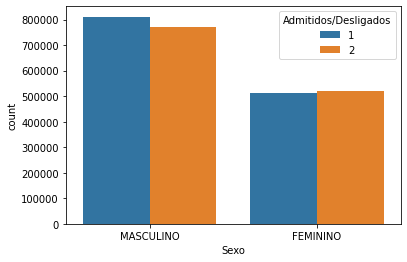

In [43]:
sns.countplot(x='Sexo', data=df, hue ='Admitidos/Desligados')

In [ ]:
"sns.countplot(x='Sexo', data=df, hue ='Salario Mensal')"

In [ ]:
"sns.countplot(x='Salario Mensal', data=df, hue ='Sexo')"

<Figure size 864x360 with 0 Axes>

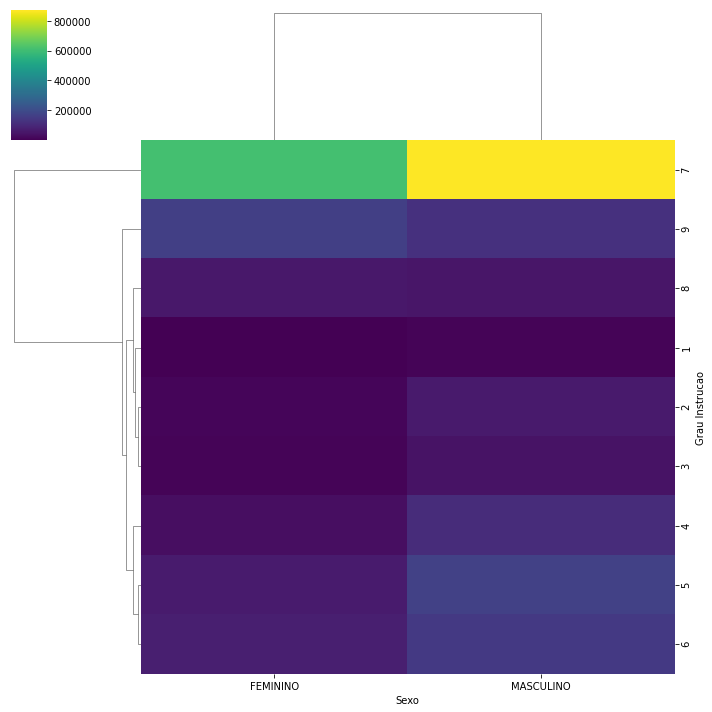

In [19]:
teste = df.groupby(by=['Grau Instrucao','Sexo']).count()['Salario Mensal'].unstack()
plt.figure(figsize=(12,5))
sns.clustermap(teste,cmap='viridis')